   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
['neg' 'pos' 'unsup']
2470
Epoch 1/5
293/293 [==============================] - 9s 28ms/step - loss: 0.9171 - acc: 0.4986 - val_loss: 0.8349 - val_acc: 0.5179
Epoch 2/5
293/293 [==============================] - 8s 27ms/step - loss: 0.7771 - acc: 0.5878 - val_loss: 0.8356 - val_acc: 0.5218
Epoch 3/5
293/293 [==============================] - 8s 27ms/step - loss: 0.6605 - acc: 0.6997 - val_loss: 0.8686 - val_acc: 0.5120
Epoch 4/5
293/293 [==============================] - 8s 27ms/step - loss: 0.4549 - acc: 0.8448 - val_loss: 0.9476 - val_acc: 0.5154
Epoch 5/5
293/293 [==============================] - 8s 27ms/step - loss: 0.2368 - acc: 0.9510 - val_loss: 1.0832 - val_acc: 0.5147


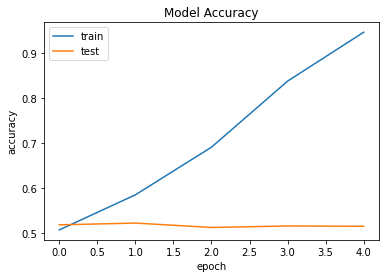

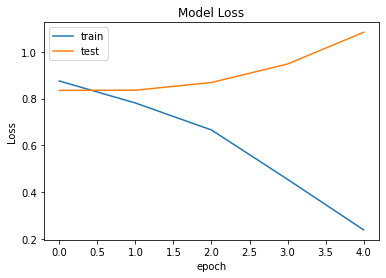

In [9]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values

print(np.unique(y))


max_review_len = max([len(s.split()) for s in sentences])

#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

input_dim = max_review_len
print(input_dim)



#print(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)


# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Plotting the accuracy using history object
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting the Loss using history object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()